### Import Necessary Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score,classification_report,precision_score

### Load the datasets

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data = pd.concat([train_data, test_data], ignore_index=True)
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [ ]:
print(data.shape)

(10299, 563)


### Plot the districution of "Activity" colums value

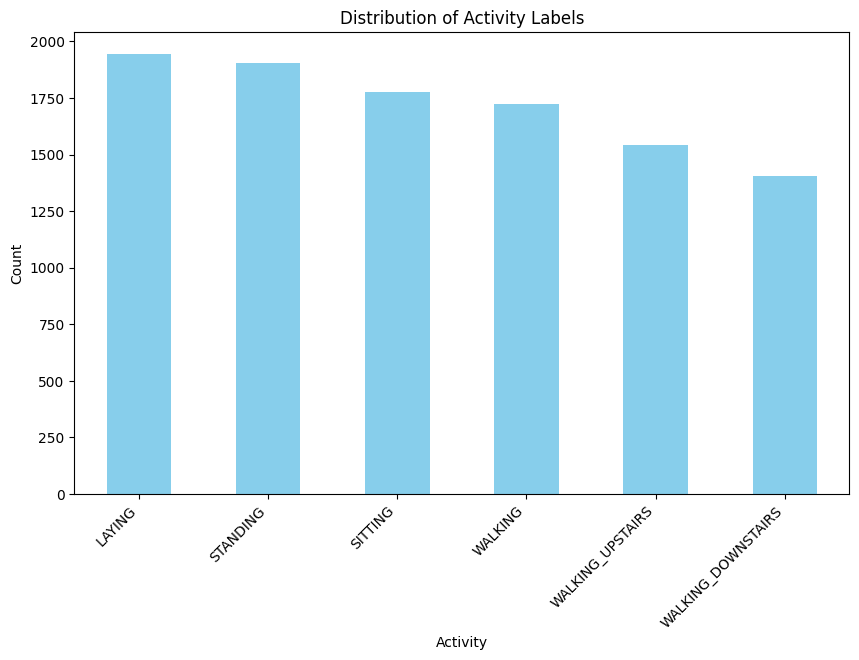

In [ ]:
activity_counts = data['Activity'].value_counts()

# 2. Plot the distribution of the 'Activity' column
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Activity Labels')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Shuffle the datasets randomly

In [ ]:
shuffled_data = data.sample(frac=1, random_state=75).reset_index(drop=True)
data = shuffled_data

### Separate features and target

In [ ]:
X = data.drop(columns=['Activity', 'subject'])
y = data['Activity']

### Encoded the label values

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Splitting the datasets (80%-20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
classifier = decision_tree = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
classifier = GradientBoostingClassifier(random_state=42)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f"{classifier.__class__.__name__} Classification Report:\n", report)

GradientBoostingClassifier Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       395
           SITTING       0.98      0.96      0.97       342
          STANDING       0.97      0.98      0.98       413
           WALKING       1.00      0.99      1.00       335
WALKING_DOWNSTAIRS       1.00      1.00      1.00       274
  WALKING_UPSTAIRS       0.99      1.00      1.00       301

          accuracy                           0.99      2060
         macro avg       0.99      0.99      0.99      2060
      weighted avg       0.99      0.99      0.99      2060



### Confussion Matrix

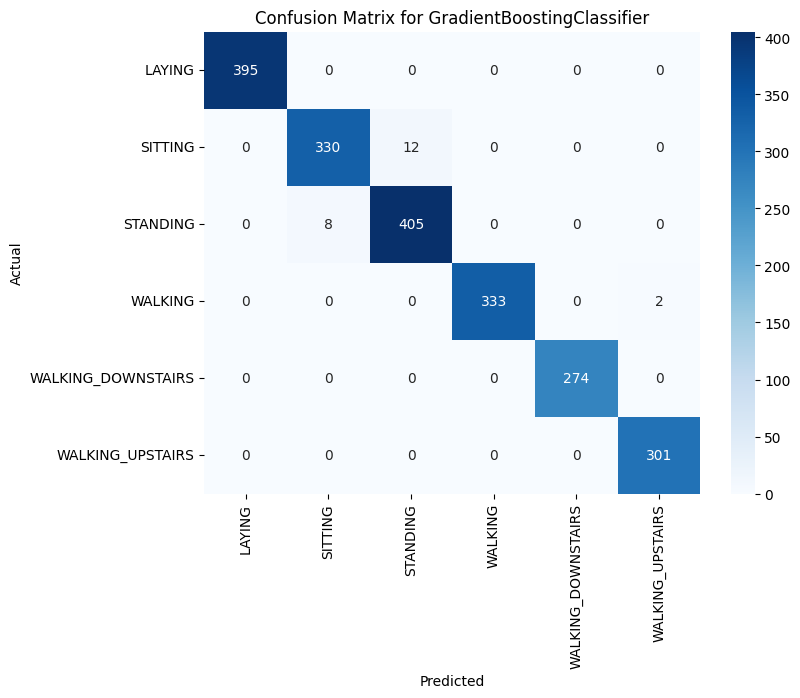

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix for {classifier.__class__.__name__}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Result Graph

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred, average='macro')  # Macro to average across all classes
recall = recall_score(y_test, y_pred, average='macro')  # Macro to average across all classes
f1 = f1_score(y_test, y_pred, average='macro')


# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy,precision, recall, f1]



In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9893203883495145
Precision: 0.990158953743912
Recall: 0.9899286118999328
F1 Score: 0.9900310965829592


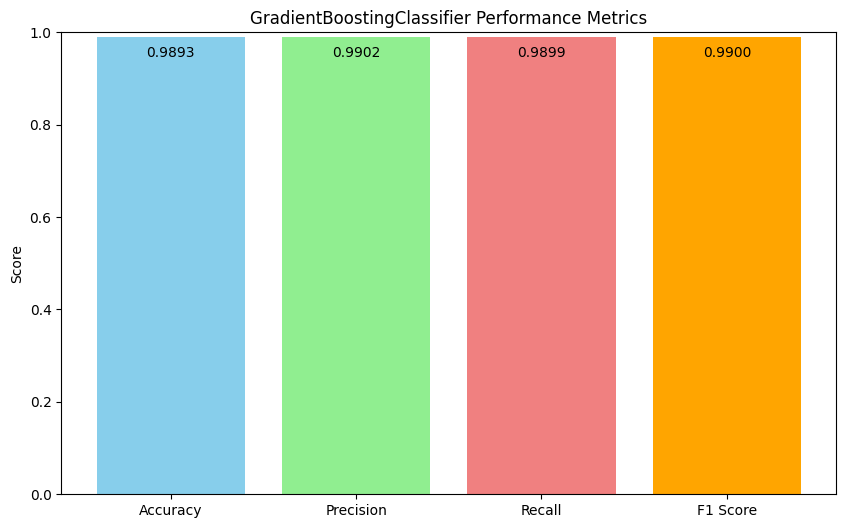

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.ylim([0, 1])  # Metrics are between 0 and 1
plt.title(f'{classifier.__class__.__name__} Performance Metrics')
plt.ylabel('Score')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f'{yval:.4f}', ha='center', va='bottom', color='black')

plt.show()